In [1]:
import sys
import os
import pandas as pd
import numpy as np
import itertools
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')
# from Src.config import hf_access_token, hf_model_cache_dir # noqa: E402
# os.environ["HF_HOME"] = hf_model_cache_dir 
# import torch

%load_ext autoreload
%autoreload 2

Load the model "gpt2" or "EleutherAI/pythia-6.9b"

In [2]:
from Src.model import ModelFactory
model = ModelFactory.create("gpt2")


/home/viki/miniconda3/envs/fact/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loaded pretrained model gpt2 into HookedTransformer


Then load the dataset (Warning, select the right dataset for the model you loaded). Load also the ablator class


In [3]:
from Src.dataset import BaseDataset
from Src.experiment import Ablator


dataset = BaseDataset(path = "../data/full_data_sampled_gpt2.json",
                      model = model,
                      experiment="copyVSfact",
                      no_subject=True)
ablator = Ablator(model=model, dataset=dataset, experiment="copyVSfact", batch_size=20)

 No subject found in the dataset , proceeding with no subject data


Tokenizing and computing lengths: 100%|██████████| 10000/10000 [01:28<00:00, 113.12it/s]


Set the heads that you want to modify, the value to multiply the heads and the token position that you want to modify (all, or attribute):

In [5]:
cofa_heads = [(7, 10), (9, 9), (9, 6), (10, 0)]
fa_heads = [(10, 7), (11, 10), (11, 3)]

betas = [1, 0]
alphas = [1, 5]

In [58]:
# ablator.set_heads(heads=[(10, 3)], value=2, position='attribute')
# print(ablator.model.model.hook_dict.values())


Run the attention modification:


- mem --> logit of the factual token


- cp --> logit of the counterfactual token

- mem win --> number of factual predictions

- cp win --> number of counterfactual predictions

In [65]:
result_boost = []
for alpha in alphas:
    # all subsets of fa heads
    for fa_max in range(1, len(fa_heads)+1):
        for fa_heads_subset in itertools.combinations(fa_heads, fa_max):
            print(f'alpha: {alpha}, fa_heads_subset: {fa_heads_subset}')
            ablator.set_heads(heads=list(fa_heads_subset), value=alpha, position='attribute')
            
            cur_df = ablator.run()
            cur_df['alpha'] = alpha
            cur_df['heads'] = str(fa_heads_subset)
            cur_df['experiment'] = 'boost'
            result_boost.append(cur_df)

result_boost = pd.concat(result_boost)


alpha: 1, fa_heads_subset: ((10, 7),)


Ablating:   0%|          | 0/24 [00:00<?, ?it/s]

Ablating: 100%|██████████| 24/24 [01:19<00:00,  3.30s/it]


alpha: 1, fa_heads_subset: ((11, 10),)


Ablating: 100%|██████████| 24/24 [01:19<00:00,  3.31s/it]


alpha: 1, fa_heads_subset: ((11, 3),)


Ablating: 100%|██████████| 24/24 [01:19<00:00,  3.32s/it]


alpha: 1, fa_heads_subset: ((10, 7), (11, 10))


Ablating: 100%|██████████| 24/24 [01:51<00:00,  4.65s/it]


alpha: 1, fa_heads_subset: ((10, 7), (11, 3))


Ablating: 100%|██████████| 24/24 [01:51<00:00,  4.64s/it]


alpha: 1, fa_heads_subset: ((11, 10), (11, 3))


Ablating: 100%|██████████| 24/24 [01:52<00:00,  4.67s/it]


alpha: 1, fa_heads_subset: ((10, 7), (11, 10), (11, 3))


Ablating: 100%|██████████| 24/24 [02:24<00:00,  6.03s/it]


alpha: 5, fa_heads_subset: ((10, 7),)


Ablating: 100%|██████████| 24/24 [01:21<00:00,  3.41s/it]


alpha: 5, fa_heads_subset: ((11, 10),)


Ablating: 100%|██████████| 24/24 [01:20<00:00,  3.36s/it]


alpha: 5, fa_heads_subset: ((11, 3),)


Ablating: 100%|██████████| 24/24 [01:25<00:00,  3.54s/it]


alpha: 5, fa_heads_subset: ((10, 7), (11, 10))


Ablating: 100%|██████████| 24/24 [01:55<00:00,  4.83s/it]


alpha: 5, fa_heads_subset: ((10, 7), (11, 3))


Ablating: 100%|██████████| 24/24 [01:57<00:00,  4.88s/it]


alpha: 5, fa_heads_subset: ((11, 10), (11, 3))


Ablating: 100%|██████████| 24/24 [02:06<00:00,  5.29s/it]


alpha: 5, fa_heads_subset: ((10, 7), (11, 10), (11, 3))


Ablating: 100%|██████████| 24/24 [02:43<00:00,  6.81s/it]


In [66]:
print(result_boost) 

         mem         cp      diff   mem_std    cp_std  diff_std  mem_win  \
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  13.981473  17.561539 -3.580064  1.674214  2.685192  2.665300    413.0   
0  14.456228  16.385796 -1.929568  1.665862  2.691089  2.686700   2392.0   
0  13.594149  15.910871 -2.316722  1.651094  2.787582  2.762573   1864.0   
0  13.966662  17.532597 -3.565933  1.673361  2.688501  2.663716    421.0   
0  13.857364  14.130378 -0.273015  1.666047  2.702236  2.729101   5014.0   
0  14.439142  16.357597 -1.918455  1.665223  2.691837  2.685108   2419.0   
0  13.578178

In [68]:
result_surpress = []
# for beta in betas:
    # all subsets of cofa heads
for cofa_max in range(1, len(cofa_heads)+1):
    for cofa_heads_subset in itertools.combinations(cofa_heads, cofa_max):
        print(f'beta: {0}, cofa_heads_subset: {cofa_heads_subset}')
        ablator.set_heads(heads=list(cofa_heads_subset), value=0, position='attribute')
        cur_df = ablator.run()
        cur_df['beta'] = 0
        cur_df['heads'] = str(cofa_heads_subset)
        cur_df['experiment'] = 'surpress'
        result_surpress.append(cur_df)

result_surpress = pd.concat(result_surpress)

beta: 0, cofa_heads_subset: ((7, 10),)


Ablating: 100%|██████████| 24/24 [01:20<00:00,  3.36s/it]


beta: 0, cofa_heads_subset: ((9, 9),)


Ablating: 100%|██████████| 24/24 [01:23<00:00,  3.50s/it]


beta: 0, cofa_heads_subset: ((9, 6),)


Ablating: 100%|██████████| 24/24 [01:21<00:00,  3.41s/it]


beta: 0, cofa_heads_subset: ((10, 0),)


Ablating: 100%|██████████| 24/24 [01:20<00:00,  3.35s/it]


beta: 0, cofa_heads_subset: ((7, 10), (9, 9))


Ablating: 100%|██████████| 24/24 [01:52<00:00,  4.70s/it]


beta: 0, cofa_heads_subset: ((7, 10), (9, 6))


Ablating: 100%|██████████| 24/24 [01:52<00:00,  4.70s/it]


beta: 0, cofa_heads_subset: ((7, 10), (10, 0))


Ablating: 100%|██████████| 24/24 [01:53<00:00,  4.74s/it]


beta: 0, cofa_heads_subset: ((9, 9), (9, 6))


Ablating: 100%|██████████| 24/24 [01:53<00:00,  4.74s/it]


beta: 0, cofa_heads_subset: ((9, 9), (10, 0))


Ablating: 100%|██████████| 24/24 [01:52<00:00,  4.71s/it]


beta: 0, cofa_heads_subset: ((9, 6), (10, 0))


Ablating: 100%|██████████| 24/24 [01:51<00:00,  4.64s/it]


beta: 0, cofa_heads_subset: ((7, 10), (9, 9), (9, 6))


Ablating: 100%|██████████| 24/24 [02:18<00:00,  5.78s/it]


beta: 0, cofa_heads_subset: ((7, 10), (9, 9), (10, 0))


Ablating: 100%|██████████| 24/24 [02:25<00:00,  6.08s/it]


beta: 0, cofa_heads_subset: ((7, 10), (9, 6), (10, 0))


Ablating: 100%|██████████| 24/24 [02:45<00:00,  6.89s/it]


beta: 0, cofa_heads_subset: ((9, 9), (9, 6), (10, 0))


Ablating: 100%|██████████| 24/24 [03:23<00:00,  8.47s/it]


beta: 0, cofa_heads_subset: ((7, 10), (9, 9), (9, 6), (10, 0))


Ablating: 100%|██████████| 24/24 [02:56<00:00,  7.34s/it]


In [69]:
data = pd.concat([result_boost, result_surpress])
data.to_csv('results_boost_surpress.csv', index=False)
data

,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,alpha,heads,experiment,beta
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7),)",boost,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((11, 10),)",boost,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((11, 3),)",boost,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7), (11, 10))",boost,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7), (11, 3))",boost,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((11, 10), (11, 3))",boost,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7), (11, 10), (11, 3))",boost,NaN
0,14.456228,16.385796,-1.929568,1.665862,2.691089,2.686700,2392.0,7495.0,5.0,"((10, 7),)",boost,NaN
0,13.594149,15.910871,-2.316722,1.651094,2.787582,2.762573,1864.0,8009.0,5.0,"((11, 10),)",boost,NaN
0,13.966662,17.532597,-3.565933,1.673361,2.688501,2.663716,421.0,9540.0,5.0,"((11, 3),)",boost,NaN


In [74]:
best_boost = [((10, 7), (11, 10), (11, 3)), ((10, 7), (11, 10))]
best_surpress = [((7, 10), (9, 9), (9, 6), (10, 0)), ((7, 10), (9, 9), (10, 0)), ((9, 9), (9, 6), (10, 0))]
combined_result = []
for bost in best_boost:
    for surpress in best_surpress:
        ablator.set_heads(heads=list(bost), value=5, position='attribute')
        ablator.set_heads(heads=list(surpress), value=0, position='attribute', reset=False)
        cur_df = ablator.run()
        cur_df['experiment'] = 'combined'
        cur_df['heads_boost'] = str(bost)
        cur_df['beta'] = 0
        cur_df['alpha'] = 5
        cur_df['heads_surpress'] = str(surpress)
        combined_result.append(cur_df)

combined_result = pd.concat(combined_result)

Ablating: 100%|██████████| 24/24 [03:12<00:00,  8.00s/it]


In [5]:
ablator.set_heads(heads=[(10, 7), (11, 10)], value=5, position='all')
ablator.set_heads(heads=[(7, 10), (9, 9), (9, 6), (10, 0)], value=0, position='all', reset=False)
cur_df = ablator.run()
cur_df

Ablating:   0%|          | 0/24 [00:00<?, ?it/s]

Ablating: 100%|██████████| 24/24 [08:58<00:00, 22.43s/it]


,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win
0,14.403828,15.590135,-1.186308,1.689213,2.639493,2.233936,2894.0,6839.0


In [75]:
data = pd.concat([result_boost, result_surpress, combined_result])
data.to_csv('results_boost_surpress.csv', index=False)
data

,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,alpha,heads,experiment,beta,heads_boost,heads_surpress
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7),)",boost,NaN,NaN,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((11, 10),)",boost,NaN,NaN,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((11, 3),)",boost,NaN,NaN,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7), (11, 10))",boost,NaN,NaN,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7), (11, 3))",boost,NaN,NaN,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((11, 10), (11, 3))",boost,NaN,NaN,NaN
0,13.981473,17.561539,-3.580064,1.674214,2.685192,2.665300,413.0,9547.0,1.0,"((10, 7), (11, 10), (11, 3))",boost,NaN,NaN,NaN
0,14.456228,16.385796,-1.929568,1.665862,2.691089,2.686700,2392.0,7495.0,5.0,"((10, 7),)",boost,NaN,NaN,NaN
0,13.594149,15.910871,-2.316722,1.651094,2.787582,2.762573,1864.0,8009.0,5.0,"((11, 10),)",boost,NaN,NaN,NaN
0,13.966662,17.532597,-3.565933,1.673361,2.688501,2.663716,421.0,9540.0,5.0,"((11, 3),)",boost,NaN,NaN,NaN


In [32]:
data.to_csv("../data/ablation_results.csv", index=False)

In [8]:
individual = []
ablator.set_heads(heads=[(10, 0)], value=0, position="attribute") #counter
individual.append(ablator.run())


ablator.set_heads(heads=[(11, 3)], value=5, position="attribute") #fact
individual.append(ablator.run())


ablator.set_heads(heads=[(10, 0)], value=0, position="attribute")
ablator.set_heads(heads=[(11, 3)], value=5, position="attribute", reset=False)
individual.append(ablator.run())

individual_data = pd.concat(individual)
individual_data["experiment"] = "individual"
individual_data["fa_alpha"] = [1, 5, 5]
individual_data["cofa_alpha"] = [0, 1, 0]
individual_data['percentage'] = individual_data['mem_win'] / (individual_data['mem_win'] + individual_data['cp_win']).astype(float)

individual_data



Ablating: 100%|██████████| 24/24 [01:46<00:00,  4.42s/it]


,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,experiment,fa_alpha,cofa_alpha,percentage
0,14.532300,17.067745,-2.535445,1.582479,2.740251,2.591399,1274.0,8660.0,individual,1,0,0.128246
0,13.966662,17.532597,-3.565933,1.673361,2.688501,2.663716,421.0,9540.0,individual,5,1,0.042265
0,14.509600,17.066998,-2.557397,1.588190,2.716855,2.574206,1205.0,8733.0,individual,5,0,0.121252


## Random boosting

You can pass to the model your own modification function. You can pass a list of hook (string, function) to the model using set_hooks method. The hooks should be consistent with the hook of the transformer lens library (https://neelnanda-io.github.io/TransformerLens/index.html)

In [19]:
import numpy as np
np.random.seed(147)
random_early_heads = np.stack([np.random.choice(range(4), 5), np.random.choice(range(12), 5)]).T

random_middle_heads = np.stack([np.random.choice(range(4, 8), 5), np.random.choice(range(12), 5)]).T

random_late_heads = np.stack([np.random.choice(range(8, 12), 5), np.random.choice(range(12), 5)]).T


print(random_early_heads)
print(random_middle_heads)
print(random_late_heads)

random = []
for head in random_early_heads:
    ablator.set_heads(heads=[head], value=5, position="attribute") #fact
    df = ablator.run()
    df["experiment"] = "random_early"
    df["heads"] = str(head)
    random.append(df)

for head in random_middle_heads:
    ablator.set_heads(heads=[head], value=5, position="attribute") #fact
    df = ablator.run()
    df["experiment"] = "random_mid"
    df["heads"] = str(head)
    random.append(df)

for head in random_late_heads:
    ablator.set_heads(heads=[head], value=5, position="attribute") #fact
    df = ablator.run()
    df["experiment"] = "random_late"
    df["heads"] = str(head)
    random.append(df)

random_data = pd.concat(random)
random_data["fa_alpha"] = 5
random_data["cofa_alpha"] = 1

    

[[ 2  9]
 [ 0 11]
 [ 3  9]
 [ 1  1]
 [ 2  2]]
[[6 4]
 [6 8]
 [4 8]
 [6 9]
 [6 0]]
[[11 11]
 [ 8  8]
 [ 9 10]
 [10  6]
 [ 8 10]]


Ablating:   0%|          | 0/24 [00:00<?, ?it/s]

Ablating: 100%|██████████| 24/24 [01:16<00:00,  3.19s/it]


In [21]:
random_data

,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,experiment,heads,fa_alpha,cofa_alpha
0,13.978224,17.562319,-3.584095,1.674854,2.684771,2.664509,412.0,9549.0,random_early,[2 9],5,0
0,13.982534,17.562664,-3.580130,1.674376,2.685891,2.665895,415.0,9545.0,random_early,[ 0 11],5,0
0,13.980992,17.560793,-3.579801,1.674256,2.685249,2.664893,414.0,9546.0,random_early,[3 9],5,0
0,13.979218,17.562819,-3.583604,1.674818,2.684860,2.664897,413.0,9547.0,random_early,[1 1],5,0
0,13.981484,17.561604,-3.580119,1.674214,2.685148,2.665253,413.0,9547.0,random_early,[2 2],5,0
0,13.957660,17.572296,-3.614634,1.684924,2.684916,2.673928,401.0,9553.0,random_mid,[6 4],5,0
0,13.976337,17.561872,-3.585535,1.674760,2.685283,2.664190,411.0,9550.0,random_mid,[6 8],5,0
0,13.980709,17.551096,-3.570386,1.670367,2.681311,2.663061,415.0,9545.0,random_mid,[4 8],5,0
0,13.914752,17.913893,-3.999141,1.741619,2.659269,2.669430,299.0,9661.0,random_mid,[6 9],5,0
0,13.982951,17.559069,-3.576116,1.673546,2.685097,2.665607,418.0,9542.0,random_mid,[6 0],5,0


In [ ]:
consecutive = [[[l, h],[(l+1)%12, np.random.choice(range(12))]] for l, h in np.vstack([random_early_heads,random_middle_heads,random_late_heads])]
print(consecutive)

[[[2, 9], [3, 10]], [[0, 11], [1, 2]], [[3, 9], [4, 6]], [[1, 1], [2, 6]], [[2, 2], [3, 10]], [[6, 4], [7, 7]], [[6, 8], [7, 7]], [[4, 8], [5, 8]], [[6, 9], [7, 10]], [[6, 0], [7, 3]], [[11, 11], [0, 3]], [[8, 8], [9, 7]], [[9, 10], [10, 11]], [[10, 6], [11, 7]], [[8, 10], [9, 3]]]
[[[2, 9], [2, 10]], [[0, 11], [0, 0]], [[3, 9], [3, 10]], [[1, 1], [1, 2]], [[2, 2], [2, 3]], [[6, 4], [6, 5]], [[6, 8], [6, 9]], [[4, 8], [4, 9]], [[6, 9], [6, 10]], [[6, 0], [6, 1]], [[11, 11], [11, 0]], [[8, 8], [8, 9]], [[9, 10], [9, 11]], [[10, 6], [10, 7]], [[8, 10], [8, 11]]]


In [29]:
for heads in consecutive:
    ablator.set_heads(heads=heads, value=5, position="attribute") #fact
    df = ablator.run()
    df["experiment"] = "consecutive"
    df["heads"] = str(heads)
    random.append(df)

Ablating: 100%|██████████| 24/24 [01:47<00:00,  4.47s/it]


In [30]:
random_data = pd.concat(random)
random_data["fa_alpha"] = 5
random_data["cofa_alpha"] = 1
random_data


,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,experiment,heads,fa_alpha,cofa_alpha
0,13.978224,17.562319,-3.584095,1.674854,2.684771,2.664509,412.0,9549.0,random_early,[2 9],5,1
0,13.982534,17.562664,-3.580130,1.674376,2.685891,2.665895,415.0,9545.0,random_early,[ 0 11],5,1
0,13.980992,17.560793,-3.579801,1.674256,2.685249,2.664893,414.0,9546.0,random_early,[3 9],5,1
0,13.979218,17.562819,-3.583604,1.674818,2.684860,2.664897,413.0,9547.0,random_early,[1 1],5,1
0,13.981484,17.561604,-3.580119,1.674214,2.685148,2.665253,413.0,9547.0,random_early,[2 2],5,1
0,13.957660,17.572296,-3.614634,1.684924,2.684916,2.673928,401.0,9553.0,random_mid,[6 4],5,1
0,13.976337,17.561872,-3.585535,1.674760,2.685283,2.664190,411.0,9550.0,random_mid,[6 8],5,1
0,13.980709,17.551096,-3.570386,1.670367,2.681311,2.663061,415.0,9545.0,random_mid,[4 8],5,1
0,13.914752,17.913893,-3.999141,1.741619,2.659269,2.669430,299.0,9661.0,random_mid,[6 9],5,1
0,13.982951,17.559069,-3.576116,1.673546,2.685097,2.665607,418.0,9542.0,random_mid,[6 0],5,1


In [31]:
same_layer = [[[l, h] , [l, np.random.choice(range(12))]] for l, h in np.vstack([random_early_heads,random_middle_heads,random_late_heads])]
print(same_layer)

[[[2, 9], [2, 1]], [[0, 11], [0, 9]], [[3, 9], [3, 7]], [[1, 1], [1, 4]], [[2, 2], [2, 3]], [[6, 4], [6, 0]], [[6, 8], [6, 1]], [[4, 8], [4, 0]], [[6, 9], [6, 0]], [[6, 0], [6, 2]], [[11, 11], [11, 11]], [[8, 8], [8, 8]], [[9, 10], [9, 10]], [[10, 6], [10, 8]], [[8, 10], [8, 10]]]


In [32]:
for heads in same_layer:
    ablator.set_heads(heads=heads, value=5, position="attribute") #fact
    df = ablator.run()
    df["experiment"] = "same_layer"
    df["heads"] = str(heads)
    random.append(df)

random_data = pd.concat(random)
random_data["fa_alpha"] = 5
random_data["cofa_alpha"] = 1
random_data

Ablating: 100%|██████████| 24/24 [01:48<00:00,  4.54s/it]


,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,experiment,heads,fa_alpha,cofa_alpha
0,13.978224,17.562319,-3.584095,1.674854,2.684771,2.664509,412.0,9549.0,random_early,[2 9],5,1
0,13.982534,17.562664,-3.580130,1.674376,2.685891,2.665895,415.0,9545.0,random_early,[ 0 11],5,1
0,13.980992,17.560793,-3.579801,1.674256,2.685249,2.664893,414.0,9546.0,random_early,[3 9],5,1
0,13.979218,17.562819,-3.583604,1.674818,2.684860,2.664897,413.0,9547.0,random_early,[1 1],5,1
0,13.981484,17.561604,-3.580119,1.674214,2.685148,2.665253,413.0,9547.0,random_early,[2 2],5,1
0,13.957660,17.572296,-3.614634,1.684924,2.684916,2.673928,401.0,9553.0,random_mid,[6 4],5,1
0,13.976337,17.561872,-3.585535,1.674760,2.685283,2.664190,411.0,9550.0,random_mid,[6 8],5,1
0,13.980709,17.551096,-3.570386,1.670367,2.681311,2.663061,415.0,9545.0,random_mid,[4 8],5,1
0,13.914752,17.913893,-3.999141,1.741619,2.659269,2.669430,299.0,9661.0,random_mid,[6 9],5,1
0,13.982951,17.559069,-3.576116,1.673546,2.685097,2.665607,418.0,9542.0,random_mid,[6 0],5,1


In [34]:
ablator.set_heads(heads=[(8, 10)], value=25, position="attribute") #fact
df = ablator.run()
df["experiment"] = "same_layer"
df["heads"] = str(heads)
df

Ablating:   0%|          | 0/24 [00:00<?, ?it/s]

Ablating: 100%|██████████| 24/24 [03:10<00:00,  7.92s/it]


,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,experiment,heads
0,14.810916,16.906065,-2.09515,1.838773,3.080291,2.968839,2298.0,7543.0,same_layer,"[[8, 10], [8, 10]]"


In [96]:
ablator.set_heads(heads=[(8, 10)], value=5, position="all") #fact

df = ablator.run()
df["experiment"] = "same_layer"
df["heads"] = str(heads)
df

Ablating: 100%|██████████| 24/24 [10:21<00:00, 25.91s/it]


,mem,cp,diff,mem_std,cp_std,diff_std,mem_win,cp_win,experiment,heads
0,14.225165,17.378206,-3.15304,1.656526,2.513633,2.518809,588.0,9368.0,same_layer,"[[8, 10], [8, 10]]"


In [5]:
single_boost = pd.read_csv("single_boost.csv")
single_boost['heads'] = single_boost['heads'].apply(lambda x: eval(x))
single_boost['fact_recall'] = single_boost['mem_win'] / 100
single_boost_all = single_boost[single_boost['pos'] == 'all'].drop_duplicates()
single_boost_attribute = single_boost[single_boost['pos'] == 'attribute'].drop_duplicates()


In [6]:
early_layers_all = single_boost_all[single_boost_all['heads'].apply(lambda x: x[0] < 4)]
mid_layers_all = single_boost_all[single_boost_all['heads'].apply(lambda x: 4 <= x[0] < 8)]
late_layers_all = single_boost_all[single_boost_all['heads'].apply(lambda x: 8 <= x[0])]


single_all_stats = pd.DataFrame(([early_layers_all.describe()['fact_recall'], mid_layers_all.describe()['fact_recall'], late_layers_all.describe()['fact_recall']]))
single_all_stats.index = ['early', 'mid', 'late']
single_all_stats

,count,mean,std,min,25%,50%,75%,max
early,32.0,4.272500,0.321278,3.80,4.0900,4.18,4.380,5.69
mid,24.0,4.465833,0.833969,3.07,4.1275,4.34,4.500,7.93
late,27.0,4.475926,1.316631,2.77,4.0500,4.19,4.305,8.99


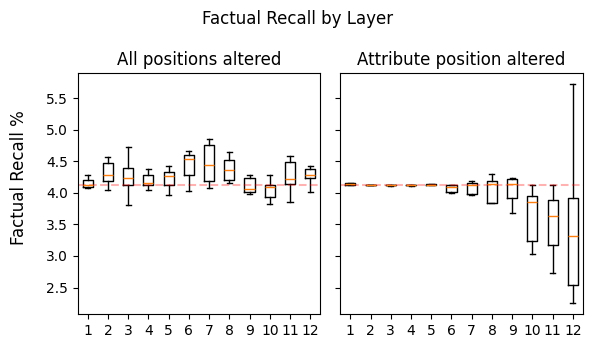

In [82]:
by_layers_all = [single_boost_all[single_boost_all['heads'].apply(lambda x: x[0] == i)] for i in range(12)]
by_layers_attribute = [single_boost_attribute[single_boost_attribute['heads'].apply(lambda x: x[0] == i)] for i in range(12)]
# make boxplots of factual recall values for each layer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(6, 3.5), sharey=True)

ax[0].boxplot([df['fact_recall'] for df in by_layers_all], showfliers=False)

ax[0].axhline(4.13, color='red', linestyle='--', alpha=0.3)
ax[0].set_title('All positions altered')

ax[1].boxplot([df['fact_recall'] for df in by_layers_attribute], showfliers=False)
ax[1].axhline(4.13, color='red', linestyle='--', alpha=0.3)
ax[1].set_title('Attribute position altered')

fig.supylabel('Factual Recall %')
fig.suptitle('Factual Recall by Layer')
fig.tight_layout()

plt.savefig('layer_recall.pdf')


In [15]:
by_layers_all = [single_boost_all[single_boost_all['heads'].apply(lambda x: x[0] == i)].describe()['mem_win'] for i in range(12)]

by_layers_all = pd.concat(by_layers_all, axis=1).T
by_layers_all['layer'] = range(12)
by_layers_all.set_index('layer', inplace=True)
by_layers_all

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
0,7.0,417.142857,12.469009,407.0,409.00,413.0,421.00,440.0
1,7.0,447.714286,56.319666,405.0,418.00,429.0,447.50,569.0
2,8.0,425.125000,27.720222,380.0,413.00,423.0,440.00,473.0
3,10.0,421.700000,17.204973,404.0,411.75,415.0,428.25,461.0
4,7.0,422.428571,15.830952,397.0,412.50,427.0,432.50,443.0
5,3.0,440.666667,33.261589,403.0,428.00,453.0,459.50,466.0
6,6.0,497.500000,147.489322,408.0,418.25,444.5,475.25,793.0
7,8.0,431.750000,60.920909,307.0,420.50,435.5,452.75,525.0
8,7.0,394.428571,53.156552,277.0,401.00,406.0,423.50,429.0


In [16]:
early_layers_attribute = single_boost_attribute[single_boost_attribute['heads'].apply(lambda x: x[0] < 4)]
mid_layers_attribute = single_boost_attribute[single_boost_attribute['heads'].apply(lambda x: 4 <= x[0] < 8)]
late_layers_attribute = single_boost_attribute[single_boost_attribute['heads'].apply(lambda x: 8 <= x[0])]

single_attribute_stats = pd.DataFrame(([early_layers_attribute.describe()['mem_win'], mid_layers_attribute.describe()['mem_win'], late_layers_attribute.describe()['mem_win']]))
single_attribute_stats.index = ['early', 'mid', 'late']
single_attribute_stats

,count,mean,std,min,25%,50%,75%,max
early,21.0,413.238095,2.188716,411.0,412.0,413.0,413.00,420.0
mid,23.0,415.043478,92.814320,249.0,404.0,413.0,414.00,796.0
late,22.0,389.136364,232.816767,21.0,310.0,385.5,412.75,1296.0


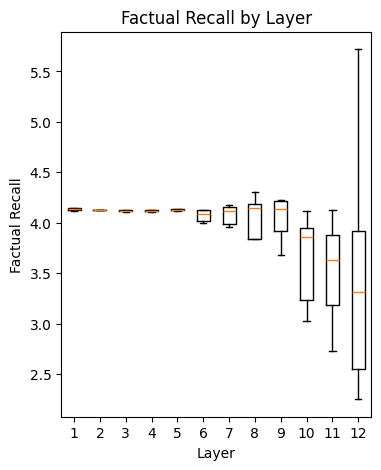

In [17]:
by_layers_attribute = [single_boost_attribute[single_boost_attribute['heads'].apply(lambda x: x[0] == i)].describe()['mem_win'] for i in range(12)]

by_layers_attribute = pd.concat(by_layers_attribute, axis=1).T
by_layers_attribute['layer'] = range(12)
by_layers_attribute.set_index('layer', inplace=True)
by_layers_attribute

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
0,6.0,414.500000,3.016621,412.0,412.25,414.0,415.00,420.0
1,3.0,413.000000,0.000000,413.0,413.00,413.0,413.00,413.0
2,7.0,413.000000,2.309401,411.0,412.00,412.0,413.00,418.0
3,5.0,412.200000,0.836660,411.0,412.00,412.0,413.00,413.0
4,6.0,413.333333,1.032796,412.0,413.00,413.0,413.75,415.0
5,6.0,404.500000,11.623253,383.0,401.75,409.0,412.50,413.0
6,7.0,440.857143,167.636938,249.0,398.50,412.0,416.00,796.0
7,4.0,388.250000,63.258069,294.0,384.00,414.5,418.75,430.0
8,6.0,550.000000,366.044260,368.0,392.25,413.5,421.25,1296.0


In [4]:
double_boost = pd.read_csv("double_boost.csv")
double_boost['heads'] = double_boost['heads'].apply(lambda x: eval(x))
double_boost_all = double_boost[double_boost['pos'] == 'all'].drop_duplicates()
double_boost_attribute = double_boost[double_boost['pos'] == 'attribute'][:-3].drop_duplicates()

In [22]:
same_layer_all = double_boost_all[double_boost_all['heads'].apply(lambda x: x[0][0] == x[1][0])]
one_layer_apart_all = double_boost_all[double_boost_all['heads'].apply(lambda x: abs(x[0][0] - x[1][0]) == 1)]
med_far_away_all = double_boost_all[double_boost_all['heads'].apply(lambda x: 1 < abs(x[0][0] - x[1][0]) < 5)]
far_away_all = double_boost_all[double_boost_all['heads'].apply(lambda x: abs(x[0][0] - x[1][0]) > 5)]

double_all_stats = pd.DataFrame(([same_layer_all.describe()['mem_win'], one_layer_apart_all.describe()['mem_win'], med_far_away_all.describe()['mem_win'], far_away_all.describe()['mem_win']]))
double_all_stats.index = ['same_layer', 'one_layer_apart', 'med_far_away', 'far_away']
double_all_stats


,count,mean,std,min,25%,50%,75%,max
same_layer,6.0,418.000000,84.204513,315.0,362.5,424.0,442.75,554.0
one_layer_apart,20.0,405.400000,40.179073,322.0,389.5,405.5,428.25,484.0
med_far_away,30.0,492.300000,136.911789,332.0,417.5,449.5,523.25,925.0
far_away,29.0,470.206897,126.492908,284.0,409.0,441.0,473.00,824.0


In [23]:
same_layer_attribute = double_boost_attribute[double_boost_attribute['heads'].apply(lambda x: x[0][0] == x[1][0])]
one_layer_apart_attribute = double_boost_attribute[double_boost_attribute['heads'].apply(lambda x: abs(x[0][0] - x[1][0]) == 1)]
med_far_away_attribute = double_boost_attribute[double_boost_attribute['heads'].apply(lambda x: 1 < abs(x[0][0] - x[1][0]) < 5)]
far_away_attribute = double_boost_attribute[double_boost_attribute['heads'].apply(lambda x: abs(x[0][0] - x[1][0]) > 5)]

double_attribute_stats = pd.DataFrame(([same_layer_attribute.describe()['mem_win'], one_layer_apart_attribute.describe()['mem_win'], med_far_away_attribute.describe()['mem_win'], far_away_attribute.describe()['mem_win']]))
double_attribute_stats.index = ['same_layer', 'one_layer_apart', 'med_far_away', 'far_away']
double_attribute_stats


,count,mean,std,min,25%,50%,75%,max
same_layer,23.0,393.260870,43.519293,281.0,392.50,412.0,414.50,456.0
one_layer_apart,28.0,409.178571,202.149753,56.0,395.00,411.5,415.25,1298.0
med_far_away,20.0,405.700000,45.171137,293.0,392.00,411.5,415.00,524.0
far_away,28.0,363.321429,122.159899,21.0,281.25,401.0,416.00,671.0
